In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
R_SQUARE_THRES = 70
KM_FIT_INTERCEPT = True
LM_FIT_INTERCEPT = True
TEST_FRAC = 1

In [3]:
def find_peptides_exists_in_at_least_k_rep(df_list, k=2):
    if len(df_list) < k:
        return set()
    peptide_appear_map = {}
    for df in df_list:
        peptide_list = list(df['Peptide'])
        for i, peptide in enumerate(peptide_list):
            if peptide not in peptide_appear_map:
                peptide_appear_map[peptide] = [float(df['Intensity'].iloc[i])]
            else:
                peptide_appear_map[peptide].append(float(df['Intensity'].iloc[i]))
    filtered_peptides = [key for key,v in peptide_appear_map.items() if len(v) >= k]
    peptide_appear_map = {key:v for key, v in peptide_appear_map.items() if key in filtered_peptides}
    return set(filtered_peptides), peptide_appear_map

In [4]:
def find_stable_peptide_that_exists_in_all_contration(df_lists, percentile_thres=80, kk=2):
    """
    filter by std of intensity under same C. thre
    df_list: 2-level nested list of df 
    return: peptide_set, peptide_intensity_median map
    """
    final_peptide_set = None
    peptide_intensities_map_list = []
    for df_list in df_lists:
        p_set, peptide_intensities_map = find_peptides_exists_in_at_least_k_rep(df_list, kk)
        peptide_intensities_map_list.append(peptide_intensities_map)
        if final_peptide_set is None:
            final_peptide_set = p_set
        else:
            final_peptide_set = final_peptide_set.intersection(p_set)
    peptide_avg_intensity_std = {}
    for peptide in final_peptide_set:
        stds = [np.std(d[peptide]) for d in peptide_intensities_map_list]
        peptide_avg_intensity_std[peptide] = np.mean(stds)
    std_threshold = np.percentile(list(peptide_avg_intensity_std.values()), percentile_thres)
    final_peptide_set = [k for k,v in peptide_avg_intensity_std.items() if v < std_threshold]
    
    peptide_intensity_median_map = {}
    for peptide in final_peptide_set:
        peptide_intensity_median_map[peptide] = np.zeros(len(peptide_intensities_map_list))
        for i, p_i_map in enumerate(peptide_intensities_map_list):
            peptide_intensity_median_map[peptide][i] = np.median(p_i_map[peptide])
    
    return set(final_peptide_set), peptide_intensity_median_map

In [5]:
file_names = glob.glob('Giai2016/*.csv')
file_names.sort(key=lambda x: (float(x.split('/')[-1].split('_')[0]), x.split('/')[-1].split('_')[1]))
file_names = file_names[:3 * 3]
file_names = [file_names[:3], file_names[3:6], file_names[6:]]
print(file_names)
df_lists = []
for file_name_list in file_names:
    df_lists.append([])
    for file_name in file_name_list:
        df = pd.read_csv(file_name)
        df.columns = ['Unnamed', 'ProteinAccession', 'Peptide', 'Intensity']
        df_lists[-1].append(df)
peptide_set, peptide_intensity_median_map = find_stable_peptide_that_exists_in_all_contration(df_lists, kk=3)
print(len(peptide_set))

[['Giai2016/5_rep1.csv', 'Giai2016/5_rep2.csv', 'Giai2016/5_rep3.csv'], ['Giai2016/10_rep1.csv', 'Giai2016/10_rep2.csv', 'Giai2016/10_rep3.csv'], ['Giai2016/25_rep1.csv', 'Giai2016/25_rep2.csv', 'Giai2016/25_rep3.csv']]
114


In [6]:
peptide_set

{'A(+42.01)DSRDPASDQM(+15.99)QHWK.E',
 'A(+42.01)SPDWGYDDKNGPEQWSK.L',
 'K.ADGLAVIGVLM(+15.99)K.V',
 'K.ADRDQYELLC(+57.02)LDNTR.K',
 'K.AGALNSNDAFVLK.T',
 'K.ALPGQLKPFETLLSQNQGGK.T',
 'K.ANRPFLVFIR.E',
 'K.ASAELIEEEVAK.L',
 'K.ATAVM(+15.99)PDGQFK.D',
 'K.AVMDDFAAFVEK.C',
 'K.AVQQPDGLAVLGIFLK.V',
 'K.C(+57.02)AFSSQEPYFSYSGAFK.C',
 'K.C(+57.02)DEWSVNSVGK.I',
 'K.C(+57.02)STSSLLEAC(+57.02)TFR.R',
 'K.DLLFRDDTVC(+57.02)LAK.L',
 'K.DNWSPALTISK.V',
 'K.DQGGELLSLR.Y',
 'K.DVTVLQNTDGNNNEAWAK.D',
 'K.EDAIWNLLR.Q',
 'K.EDLRPSAPQQEGEASK.E',
 'K.EDPQTFYYAVAVVK.K',
 'K.EGYYGYTGAFR.C',
 'K.ELFDPIISDR.H',
 'K.FC(+57.02)LFQSETK.N',
 'K.FITIFGTR.S',
 'K.FLEEHPGGEEVLR.E',
 'K.FQDGDLTLYQSNTILR.H',
 'K.GDGPVQGIINFEQK.E',
 'K.GGSFQLNELQGLK.S',
 'K.GIIWGEDTLM(+15.99)EYLENPK.K',
 'K.GISAFPESDNLFK.W',
 'K.GLGTDEESILTLLTSR.S',
 'K.GTPWEGGLFK.L',
 'K.HVVPNEVVVQR.L',
 'K.IEC(+57.02)VSAETTEDC(+57.02)IAK.I',
 'K.LEQWLC(+57.02)EKL',
 'K.LNVITVGPR.G',
 'K.LSLEFPSGYPYNAPTVK.F',
 'K.LSVEALNSLTGEFK.G',
 'K.LTNYSVTDLNVQ

In [7]:
df_lists[1][0][df_lists[1][0]['Peptide'] =='A(+42.01)DSRDPASDQM(+15.99)QHWK.E']

,Unnamed,ProteinAccession,Peptide,Intensity
100,154,P04040ups|CATA_HUMAN_UPS,A(+42.01)DSRDPASDQM(+15.99)QHWK.E,13400000.0


## filter by model log(intensity) ~ m * log(C) + k 's R^2
## get anchor peptides' parameters (k, m)

In [8]:
initial_concentraion = [5.0, 10.0, 25.0]
peptide_list = list(peptide_set)
r_square_list = []
anchor_peptide_params_dict = {}
for peptide in peptide_list:
    intensity_list = []
    ic_list = []
    for i, df_list in enumerate(df_lists):
        concentration = initial_concentraion[i]
        for df in df_list:
            temp = df[df["Peptide"]==peptide]
            if len(temp) == 1:
                intensity_list.append(temp["Intensity"].iloc[0])
                ic_list.append(concentration)
    x = np.log(ic_list).reshape(-1, 1)
    y = np.log(intensity_list).reshape(-1, 1)
    lm = LinearRegression()
    lm.fit(x, y)
    m = float(lm.coef_.flatten())
    k = float(lm.intercept_.flatten())
    anchor_peptide_params_dict[peptide] = (k, m)
    r_square_list.append(lm.score(x, y))
# set threshold to be upper ?? percentile
thres = np.percentile(r_square_list, R_SQUARE_THRES)
print(f"threshold r square {thres}")

anchor_peptide_list = [peptide for i, peptide in enumerate(peptide_list) if r_square_list[i] > thres]
anchor_peptide_set = set(anchor_peptide_list)
anchor_peptide_params_dict = {k:v for k,v in anchor_peptide_params_dict.items() if k in anchor_peptide_list}
print(len(anchor_peptide_set))

threshold r square 0.9951936442461812
34


## get test peptides. (Those exists in all three ic and not in anchor peptides.)

In [9]:
test_peptide_set = None
for i in range(3):
    temp_set, _ = find_peptides_exists_in_at_least_k_rep(df_lists[i], k=1)
    if test_peptide_set is None:
        test_peptide_set = temp_set
    else:
        test_peptide_set = test_peptide_set.intersection(temp_set)
print(len(test_peptide_set))
test_peptide_list = list(test_peptide_set)

239


In [10]:
peptide_intensity_median_map[peptide]

array([ 5690000., 11500000., 37400000.])

## build (k, m) ~ (log(ic_5), log(ic_10)) model

In [11]:
anchor_km = []
anchor_ics = []
for peptide in anchor_peptide_list:
    temp_ics = np.delete(peptide_intensity_median_map[peptide], TEST_FRAC)
    anchor_ics.append(temp_ics)
    anchor_km.append(np.asarray(anchor_peptide_params_dict[peptide]))
km_lm = LinearRegression(fit_intercept=KM_FIT_INTERCEPT)
# fit k,m ~ log(intensity) model
km_lm.fit(np.log(anchor_ics), anchor_km)
print(km_lm.score(np.log(anchor_ics), anchor_km))


train_df_lists = []
for i, df_list in enumerate(df_lists):
    if i != TEST_FRAC:
        train_df_lists.append(df_list)

# then fit (k, m) for testing peptides
testing_peptides_ics = []
for peptide in test_peptide_list:
    ics = np.zeros(len(train_df_lists))
    for i, df_list in enumerate(train_df_lists):
        intensities = []
        for df in df_list:
            temp = df[df["Peptide"] == peptide]
            if len(temp) == 1:
                intensities.append(temp["Intensity"].iloc[0])
        ics[i] = np.median(intensities)
    testing_peptides_ics.append(ics)
testing_peptides_ics = np.asarray(testing_peptides_ics)

testing_peptides_km = km_lm.predict(np.log(testing_peptides_ics))
testing_peptides_km_map = dict(zip(test_peptide_list, testing_peptides_km))

0.995587452673094


In [12]:
testing_peptides_km_map

{'A(+42.01)DSRDPASDQM(+15.99)QHWK.E': array([13.98750969,  1.13826346]),
 'A(+42.01)SPDWGYDDKNGPEQWSK.L': array([11.65574006,  1.73050866]),
 'C.FSALEVDETYVPK.E': array([9.38541644, 2.04450919]),
 'HGSPVDIC(+57.02)TAKPR.D': array([10.91190134,  0.95110459]),
 'K.AAFTEC(+57.02)C(+57.02)QAADK.A': array([13.18044077,  1.15635153]),
 'K.ADGLAVIGVLM(+15.99)K.V': array([11.23088483,  1.83045329]),
 'K.ADRDQYELLC(+57.02)LDNTR.K': array([13.05631541,  1.20589461]),
 'K.ADVLTTGAGNPVGDK.L': array([15.19142526,  0.95867768]),
 'K.AFLASPEYVNLPIN(+.98)GN(+.98)GKQ': array([8.45094353, 2.56129818]),
 'K.AGALNSNDAFVLK.T': array([13.65748284,  1.35345218]),
 'K.ALLLLC(+57.02)GEDD': array([11.22953126,  1.44480348]),
 'K.ALPGQLKPFETLLSQNQGGK.T': array([13.07978201,  1.36035689]),
 'K.ANRPFLVFIR.E': array([13.08492398,  1.06206295]),
 'K.ASAELIEEEVAK.L': array([14.27284651,  1.17148366]),
 'K.ASYLDC(+57.02)IR.A': array([12.96918798,  1.43740459]),
 'K.ATAVM(+15.99)PDGQFK.D': array([10.92780028,  1.691786

## each rep develop a model predict on Giai 25 fmol and evaluate

In [13]:
test_peptide_list

['K.LVNANGEAVYC(+57.02)K.F',
 'K.ALPGQLKPFETLLSQNQGGK.T',
 'K.EGHLSPDIVAEQK.K',
 'R.FATTFYQHLADSK.N',
 'K.ATAVM(+15.99)PDGQFK.D',
 'K.YDPSLKPLSVSYDQATSLR.I',
 'R.TTETQVLVASAQK.K',
 'K.VLAPQISFAPEIASEEER.K',
 'R.QGVEDAFYTLVR.E',
 'R.ILNNGHAFNVEFDDSQDK.A',
 'K.QTALVELVK.H',
 'R.EQAGGDATENFEDVGHSTDAR.E',
 'R.ANALLAN(+.98)GVELR.D',
 'R.LVQAFQFTDK.H',
 'K.FDEYFSQSC(+57.02)APGSDPR.S',
 'K.M(+15.99)YLGYEYVTAIR.N',
 'K.TPSAAYLWVGTGASEAEK.T',
 'K.FC(+57.02)LFQSETK.N',
 'K.GGDDLDPNYVLSSR.V',
 'R.TAGWNIPM(+15.99)GLLYNK.I',
 'K.LVAASQAALGL',
 'R.DGAGDVAFIR.E',
 'R.FFESFGDLSTPDAVM(+15.99)GNPK.V',
 'K.LNFN(+.98)GEGEPEELM(+15.99)VDNWRPAQPLK.N',
 'R.LIVHNGYC(+57.02)DGR.S',
 'K.VNVDEVGGEALGR.L',
 'K.ITIADC(+57.02)GQLE',
 'K.LRPVAAEVYGTER.Q',
 'K.EDLRPSAPQQEGEASKEKEEVAEEAQSGGD',
 'R.VVWC(+57.02)AVGEQELRK.C',
 'K.EDAIWNLLR.Q',
 'R.VVWC(+57.02)AVGEQELR.K',
 'K.DYELLC(+57.02)LDGTR.K',
 'R.TPSLPTPPTREPK.K',
 'R.TPSLPTPPTREPKK.V',
 'K.GDGPVQGIINFEQK.E',
 'K.TVEEAENIAVTSGVVR.K',
 'R.ESTVFEDLSDEAERDEYELLC(+57.

In [14]:
def lm_on_one_replication(df, anchor_peptide_list, test_peptide_list, test_peptide_km_map, fit_intercept=False):
    """
    use peptides in anchor_peptide_list to build lm model, predict on peptides in common_peptides_for_prediction_list
    returns y and y_hat
    """
    lm_x = []
    lm_y = []
    pred_x = []
    y_ = []
    for row in df.iterrows():
        peptide = row[1]['Peptide']
        if peptide in anchor_peptide_list:
            lm_x.append(anchor_peptide_params_dict[peptide])
            lm_y.append(row[1]["Intensity"])
        elif peptide in test_peptide_list:
            pred_x.append(test_peptide_km_map[peptide])
            y_.append(row[1]["Intensity"])
    lm = LinearRegression(fit_intercept=fit_intercept)
    lm_x = np.asarray(lm_x)
    lm_y = np.asarray(lm_y).reshape(-1, 1)
    print(f"regression on {len(lm_x)} peptides")
    lm.fit(lm_x, np.log(lm_y))
    
    y_hat = lm.predict(np.asarray(pred_x)).flatten()
    y_hat = np.exp(y_hat)
    y_ = np.asarray(y_)
    return y_, y_hat

In [15]:
y_ = []
y_hat = []
for rep in range(3):
    rep_y, rep_y_hat = lm_on_one_replication(df_lists[TEST_FRAC][rep], anchor_peptide_list, \
                          test_peptide_list, testing_peptides_km_map, LM_FIT_INTERCEPT)
    y_.append(rep_y)
    y_hat.append(rep_y_hat)
y_ = np.concatenate(y_)
y_hat = np.concatenate(y_hat)
assert len(y_hat) == len(y_) 


regression on 34 peptides
regression on 34 peptides
regression on 34 peptides


(0, 70000000.0)

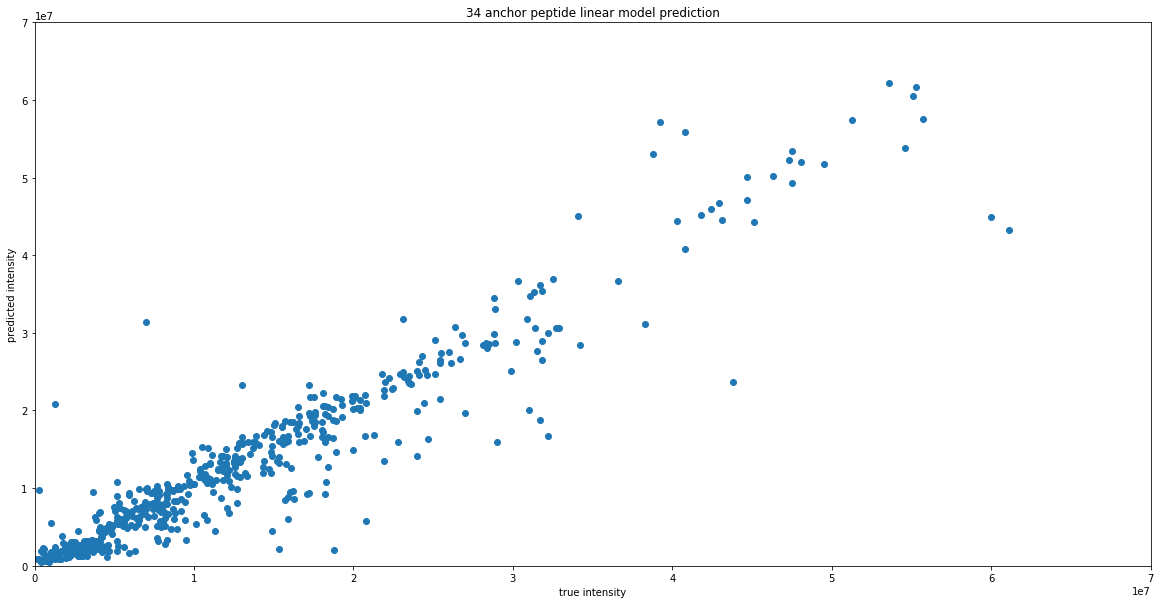

In [16]:
%matplotlib inline
plt.figure(figsize=(20, 10))
plt.title('34 anchor peptide linear model prediction')
plt.scatter(y_, y_hat)
plt.xlabel('true intensity')
plt.ylabel('predicted intensity')
plt.xlim((0, 7e7))
plt.ylim((0, 7e7))

In [17]:
percentage_diff = (y_ - y_hat) / y_
print(np.percentile(np.abs(percentage_diff), [50, 60, 70, 80, 90]))

[0.12891762 0.17406528 0.25100007 0.38167475 0.51771851]


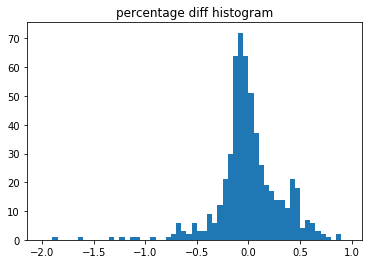

In [18]:
_,_,_ = plt.hist(percentage_diff, bins=np.arange(-2,1, 0.05))
plt.title('percentage diff histogram')

# Experiment on Ramus Dataset

In [19]:
def get_concentration_df_list(file_name_list):
    result = []
    for file_name in file_name_list:
        df = pd.read_csv(file_name)
        df.columns = ['Unnamed', 'ProteinAccession', 'Peptide', 'Intensity']
        result.append(df)
    return result
concentration_ramus_50_df_list = get_concentration_df_list(glob.glob('ramus2016/25000*.csv'))

In [20]:
y_ = []
y_hat = []
for rep in range(3):
    rep_y, rep_y_hat = lm_on_one_replication(concentration_ramus_50_df_list[rep], anchor_peptide_list, \
                          test_peptide_list, testing_peptides_km_map, LM_FIT_INTERCEPT)
    y_.append(rep_y)
    y_hat.append(rep_y_hat)
y_ = np.concatenate(y_)
y_hat = np.concatenate(y_hat)
assert len(y_hat) == len(y_) 


regression on 24 peptides
regression on 24 peptides
regression on 24 peptides


(0, 50000000.0)

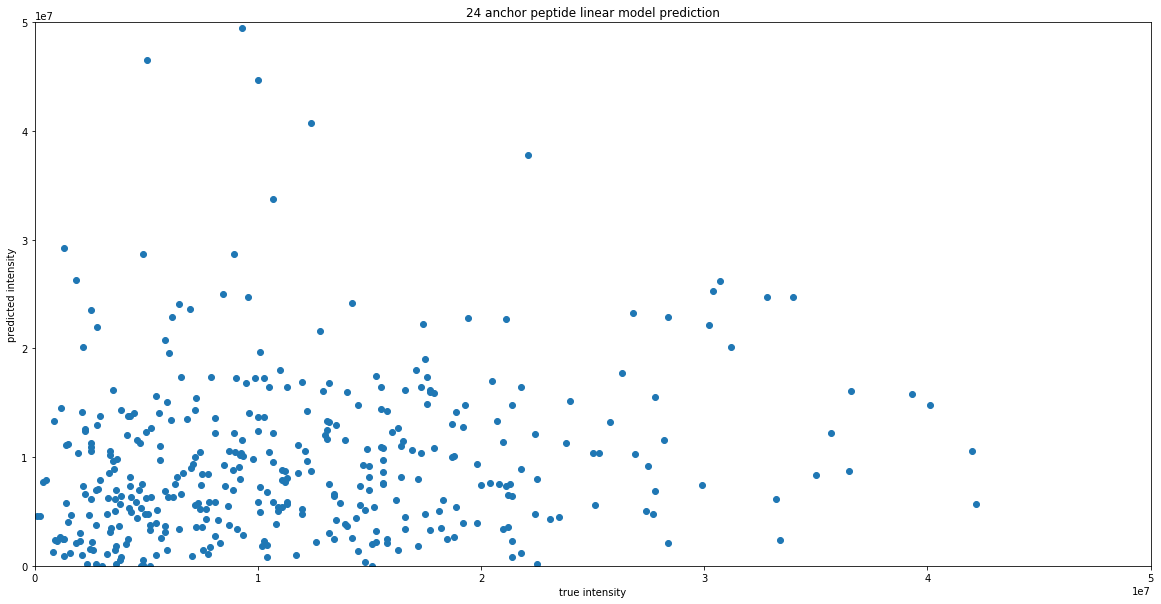

In [21]:
%matplotlib inline
plt.figure(figsize=(20, 10))
plt.title('24 anchor peptide linear model prediction')
plt.scatter(y_, y_hat)
plt.xlabel('true intensity')
plt.ylabel('predicted intensity')
plt.xlim((0, 5e7))
plt.ylim((0, 5e7))